In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import datetime as dt
from calendar import month_name
from plotly.subplots import make_subplots

In [3]:
df = pd.read_csv('Joined data/customer_data.csv', index_col=0)
df.head(5)

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

   geolocation_lat  geolocation_lng  
0       -20.498489       -47.396929  
1       -23.727992       -46.542848  
2       -23.531642       -46.656289  
3       -23.499702       -46.185233  
4       -22.975100       -47.142925

In [22]:
print("Number of unique customers:- ",len(df.customer_unique_id.unique()))
print("Number of unique cities:- ",len(df.customer_city.unique()))
df.customer_city.value_counts()

Number of unique customers:-  96096
Number of unique cities:-  4119


customer_city
sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: count, Length: 4119, dtype: int64

In [15]:
cities = df.customer_city.value_counts()[:10].sort_values(ascending=True)

data= [
    go.Bar(
        x= cities.values,
        y= cities.index,
        marker= dict(color= '#009999'),
        orientation= 'h',
        hovertemplate= '%{y}: %{x}<extra></extra>'
    )
]

layout= go.Layout(
    title= dict(
        text= '<b>Top 10 cities with highest number of customers</b><br>'+
        'Top 10 cities in Brazil having the highest number of registered customers of Olist',
        x= 0.082,
        y= 0.89
    ),
    xaxis= go.layout.XAxis(
        showticklabels= False,
        showgrid= False
    ),
    yaxis= go.layout.YAxis(
        showgrid= False
    ),
    plot_bgcolor= 'white'
)

fig = go.Figure(data= data, layout= layout)
fig.show()

In [34]:
population_cities_df = pd.read_csv('Population data/population_brazil_cities.csv', index_col=0)
print(population_cities_df.head(100))

# transform the city names to lowercase
population_cities_df.index = population_cities_df.index.str.lower()
population_cities_df.head(5)

                      Population
City Name                       
Ananindeua                433956
Anapolis                  319587
Aparecida de Goiania      510770
Aracaju                   490175
Bauru                     335024
...                          ...
Sorocaba                  558862
Teresina                  744512
Uberlandia                563536
Vila Velha                394930
Vitoria                   312656

[70 rows x 1 columns]


Population
City Name                       
ananindeua                433956
anapolis                  319587
aparecida de goiania      510770
aracaju                   490175
bauru                     335024

In [35]:
cities = df.customer_city.value_counts().sort_values(ascending=False)
for city in cities.index:
    if city not in population_cities_df.index:
        cities.drop(city, inplace= True)
        

In [37]:
print(cities)
print(population_cities_df)

customer_city
sao paulo             15540
rio de janeiro         6882
belo horizonte         2773
brasilia               2131
curitiba               1521
                      ...  
ribeirao das neves      101
olinda                   93
ananindeua               88
campina grande           68
macapa                   54
Name: count, Length: 69, dtype: int64
                      Population
City Name                       
ananindeua                433956
anapolis                  319587
aparecida de goiania      510770
aracaju                   490175
bauru                     335024
...                          ...
sorocaba                  558862
teresina                  744512
uberlandia                563536
vila velha                394930
vitoria                   312656

[70 rows x 1 columns]


In [43]:
#Top 10 cities with highest number of customers and their population
cities_df = pd.DataFrame(cities)
print(cities_df)
#change the index to city names
cities_df.reset_index(inplace= True)
cities_df.columns= ['City Name', 'customer_count']
cities_df.set_index('City Name', inplace= True)
cities_df.head(5)

#merge the two dataframes
cities_df = cities_df.join(population_cities_df)
cities_df.head(5)

                    count
customer_city            
sao paulo           15540
rio de janeiro       6882
belo horizonte       2773
brasilia             2131
curitiba             1521
...                   ...
ribeirao das neves    101
olinda                 93
ananindeua             88
campina grande         68
macapa                 54

[69 rows x 1 columns]


customer_count  Population
City Name                                 
sao paulo                15540    10021295
rio de janeiro            6882     6023699
belo horizonte            2773     2373224
brasilia                  2131     2207718
curitiba                  1521     1718421

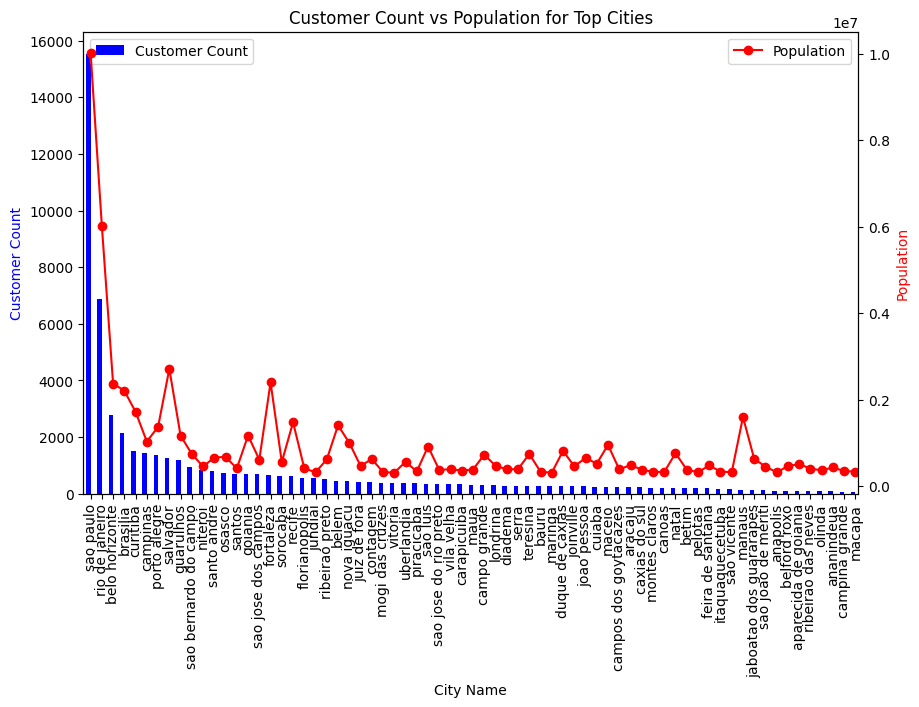

In [44]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'cities_df'
# Sort the DataFrame by customer count in descending order for better visualization
cities_df = cities_df.sort_values(by='customer_count', ascending=False)

# Create a new figure and a twin axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the customer count as a bar chart
cities_df['customer_count'].plot(kind='bar', color='blue', ax=ax1, position=1, width=0.4, label='Customer Count')

# Create a twin of the original axis to plot population
ax2 = ax1.twinx()
cities_df['Population'].plot(kind='line', color='red', marker='o', ax=ax2, label='Population')

# Set labels and title
ax1.set_xlabel('City Name')
ax1.set_ylabel('Customer Count', color='blue')
ax2.set_ylabel('Population', color='red')
plt.title('Customer Count vs Population for Top Cities')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


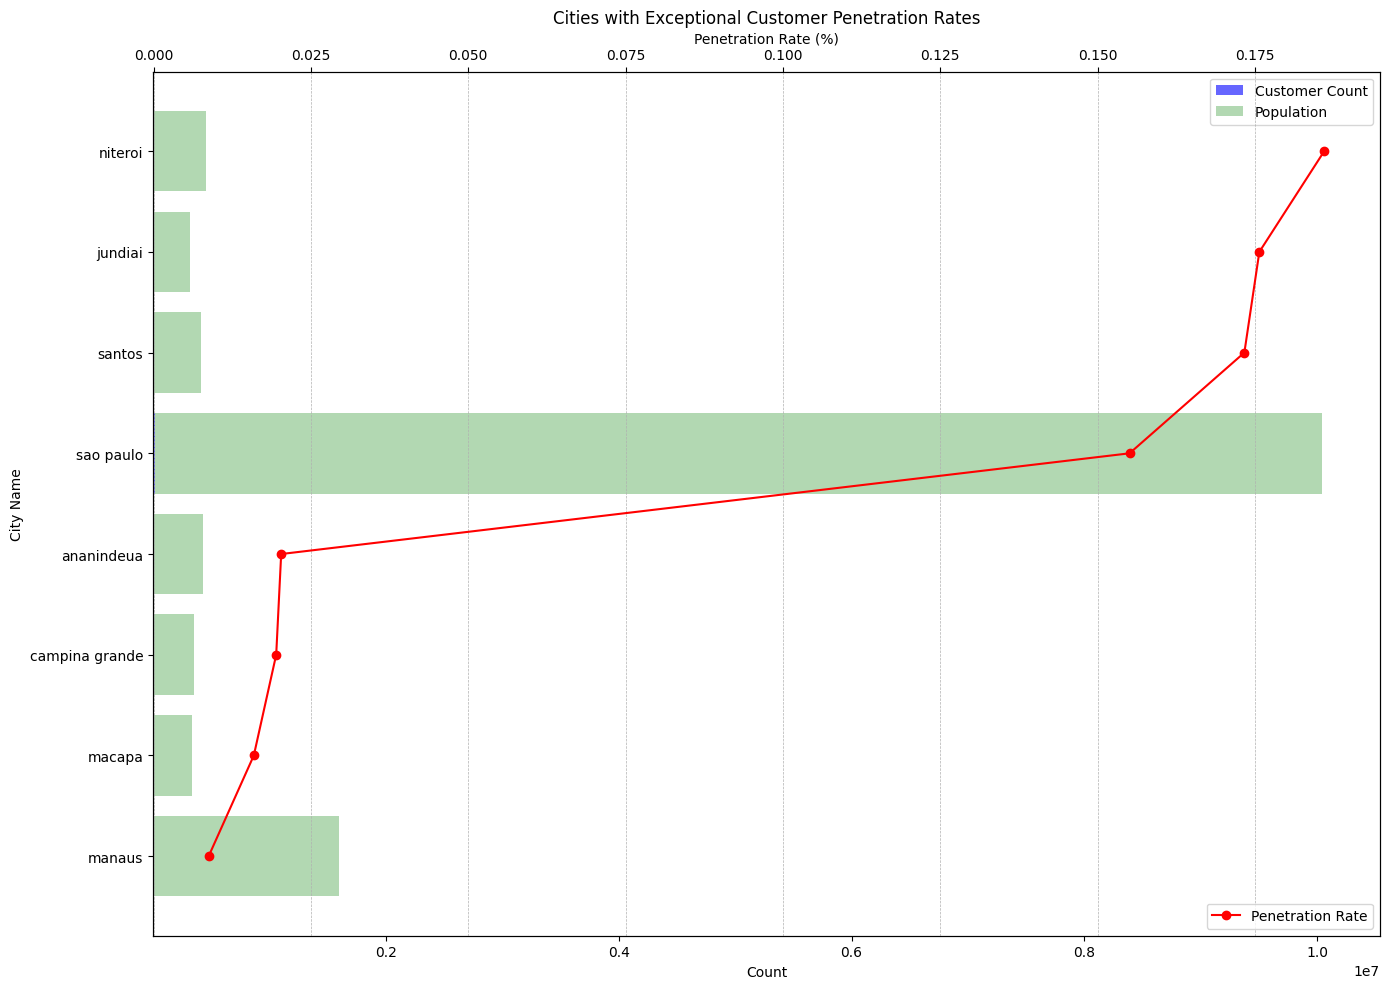

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设您的合并DataFrame名为 'cities_df'
# 计算客户渗透率
cities_df['Penetration Rate'] = (cities_df['customer_count'] / cities_df['Population']) * 100

# 识别特殊点：客户渗透率异常高或低的城市
threshold_high = cities_df['Penetration Rate'].quantile(0.95)  # 前5%
threshold_low = cities_df['Penetration Rate'].quantile(0.05)   # 后5%

# 筛选DataFrame中的特殊点
special_points_high = cities_df[cities_df['Penetration Rate'] >= threshold_high]
special_points_low = cities_df[cities_df['Penetration Rate'] <= threshold_low]

# 合并两个DataFrame并按渗透率排序
special_points = pd.concat([special_points_low, special_points_high])
special_points = special_points.sort_values(by='Penetration Rate')

# 绘制特殊点
fig, ax1 = plt.subplots(figsize=(14, 10))

# 设置颜色
colors = ['purple' if rate <= threshold_low else 'yellow' for rate in special_points['Penetration Rate']]

# 水平柱状图显示客户数量和总人口
ax1.barh(special_points.index, special_points['customer_count'], color='blue', alpha=0.6, label='Customer Count')
ax1.barh(special_points.index, special_points['Population'], color='green', alpha=0.3, left=special_points['customer_count'], label='Population')

# 创建双轴以绘制渗透率
ax2 = ax1.twiny()
ax2.plot(special_points['Penetration Rate'], special_points.index, color='red', marker='o', linestyle='-', label='Penetration Rate')

# 设置标签和标题
ax1.set_xlabel('Count')
ax2.set_xlabel('Penetration Rate (%)')
ax1.set_ylabel('City Name')
plt.title('Cities with Exceptional Customer Penetration Rates')

# 添加图例
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')

# 美化图表
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.set_axisbelow(True)
plt.tight_layout()

# 显示图表
plt.show()


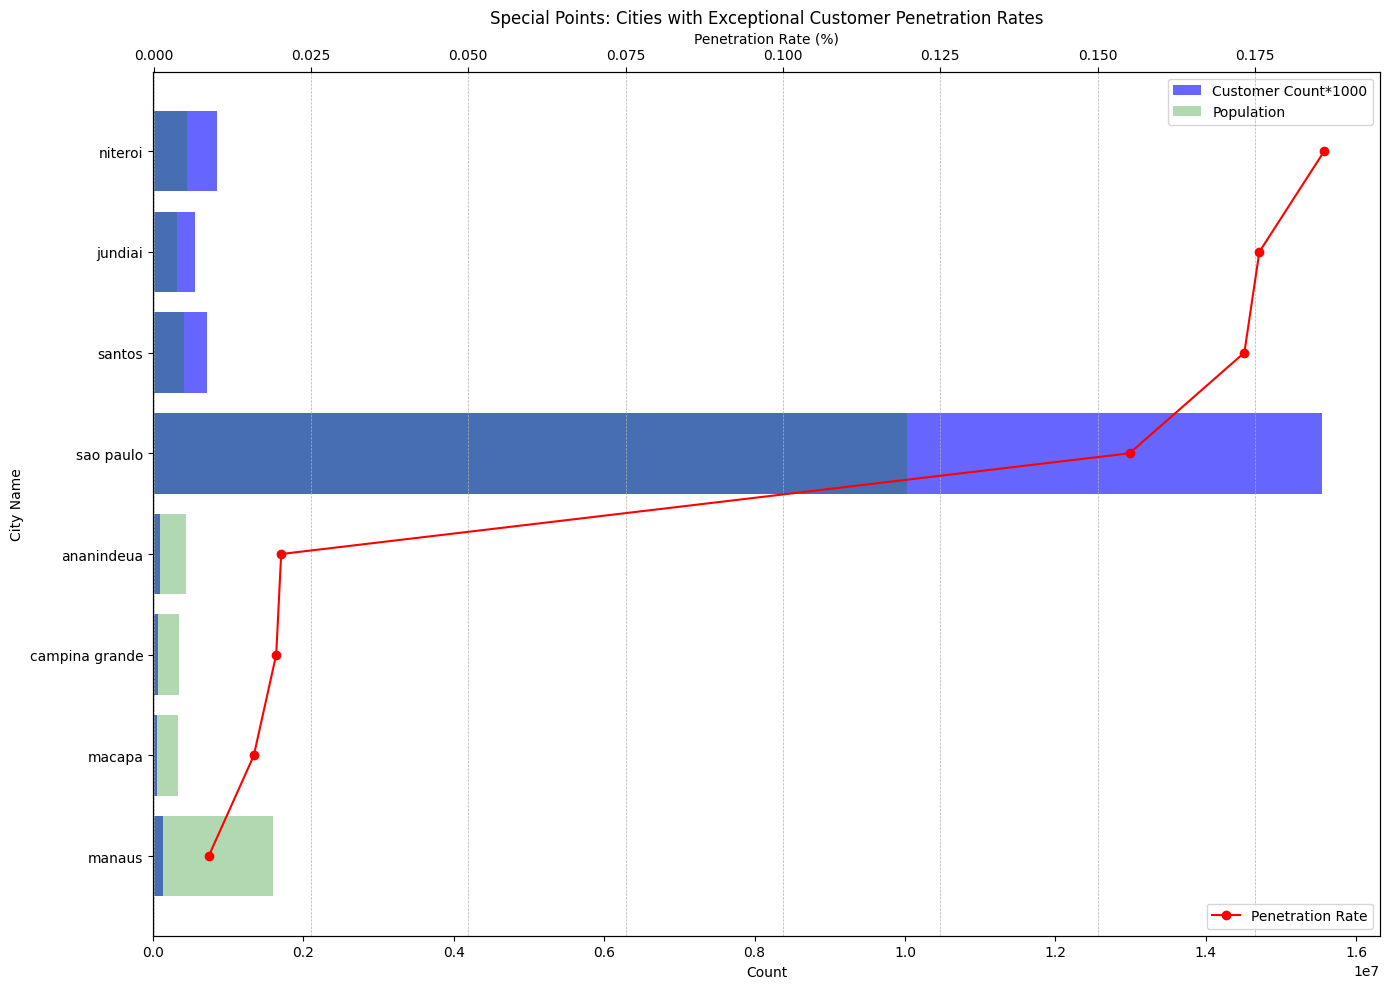

In [62]:
# Plotting the data
fig, ax1 = plt.subplots(figsize=(14, 10))


# Horizontal bar plot for customer count and population
ax1.barh(special_points.index, special_points['customer_count']*1000, color='blue', alpha=0.6, label='Customer Count*1000')
ax1.barh(special_points.index, special_points['Population'], color='green', alpha=0.3, label='Population')

# Create a twin axis to plot penetration rate
ax2 = ax1.twiny()
ax2.plot(special_points['Penetration Rate'], special_points.index, color='red', marker='o', linestyle='-', label='Penetration Rate')

# Set labels and title
ax1.set_xlabel('Count')
ax2.set_xlabel('Penetration Rate (%)')
ax1.set_ylabel('City Name')
plt.title('Special Points: Cities with Exceptional Customer Penetration Rates')

# Add legends
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')

# Make the plot look nicer
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.set_axisbelow(True)
plt.tight_layout()

# Show the plot
plt.show()

In [68]:
#seller data
seller_data = pd.read_csv('Original data/olist_sellers_dataset.csv', index_col=0)
seller_data.head(5)
seller_city = seller_data.seller_city.value_counts()
print(seller_city)

#merge the seller data with population data
seller_city = seller_city.to_frame()
seller_city.reset_index(inplace= True)
seller_city.columns= ['City Name', 'seller_count']
seller_city.set_index('City Name', inplace= True)
seller_city = seller_city.join(population_cities_df)

seller_city.dropna(inplace= True)
seller_city.head(5)

seller_city
sao paulo              694
curitiba               127
rio de janeiro          96
belo horizonte          68
ribeirao preto          52
                      ... 
taruma                   1
s jose do rio preto      1
domingos martins         1
messias targino          1
leme                     1
Name: count, Length: 611, dtype: int64


seller_count  Population
City Name                               
sao paulo                694  10021295.0
curitiba                 127   1718421.0
rio de janeiro            96   6023699.0
belo horizonte            68   2373224.0
ribeirao preto            52    619746.0

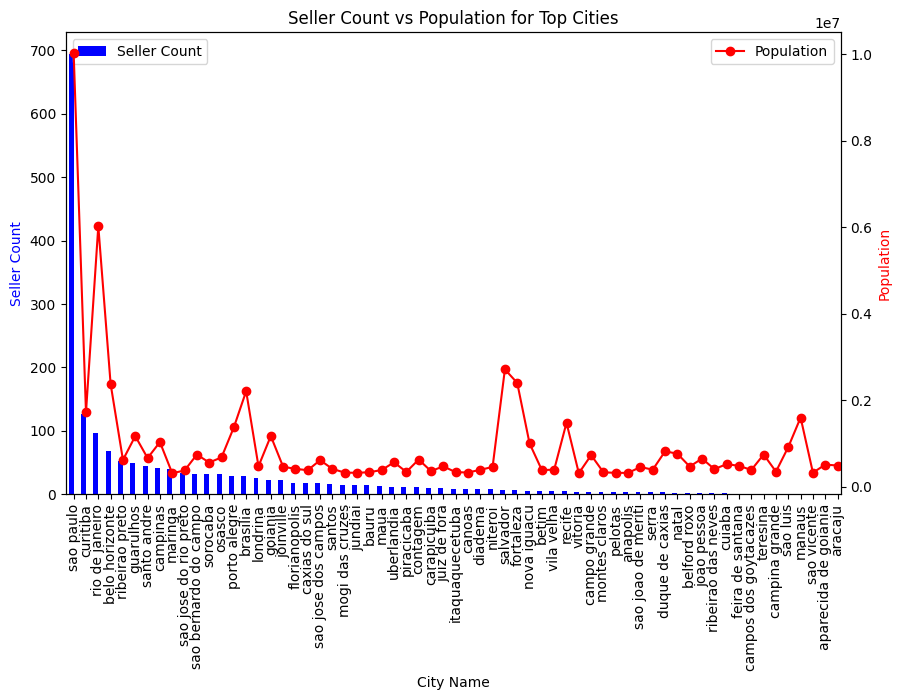

In [69]:
# Assuming your DataFrame is named 'seller_city'
# Sort the DataFrame by seller count in descending order for better visualization
seller_city = seller_city.sort_values(by='seller_count', ascending=False)

# Create a new figure and a twin axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the seller count as a bar chart
seller_city['seller_count'].plot(kind='bar', color='blue', ax=ax1, position=1, width=0.4, label='Seller Count')

# Create a twin of the original axis to plot population
ax2 = ax1.twinx()
seller_city['Population'].plot(kind='line', color='red', marker='o', ax=ax2, label='Population')

# Set labels and title
ax1.set_xlabel('City Name')
ax1.set_ylabel('Seller Count', color='blue')
ax2.set_ylabel('Population', color='red')
plt.title('Seller Count vs Population for Top Cities')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


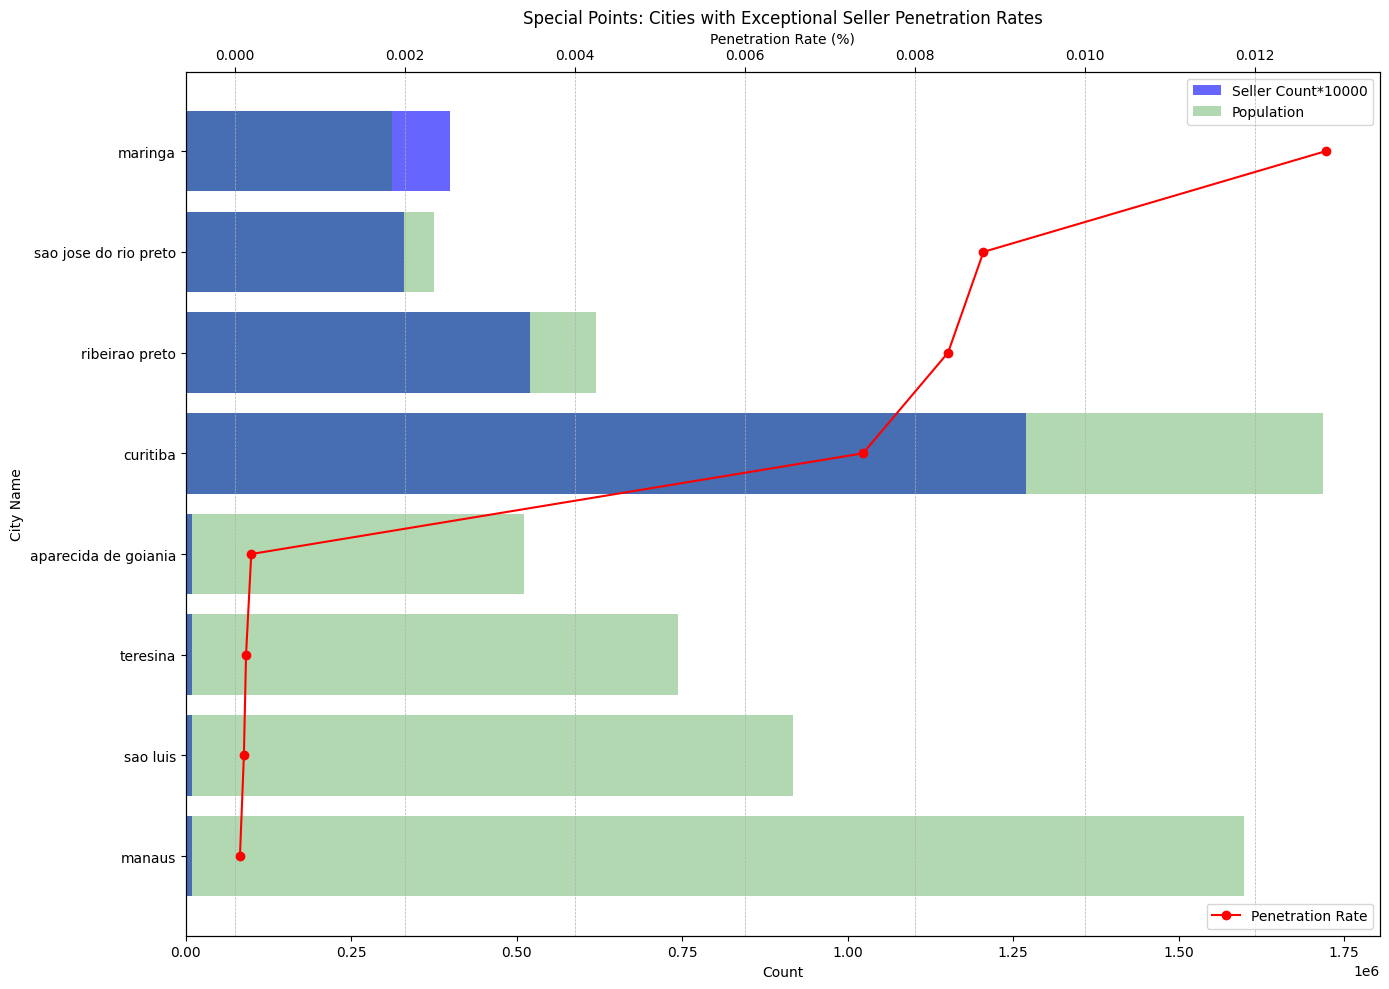

In [74]:
# 计算卖家渗透率
seller_city['Penetration Rate'] = (seller_city['seller_count'] / seller_city['Population']) * 100

# 识别特殊点：卖家渗透率异常高或低的城市
threshold_high = seller_city['Penetration Rate'].quantile(0.95)  # 前5%
threshold_low = seller_city['Penetration Rate'].quantile(0.05)   # 后5%

# 筛选DataFrame中的特殊点
special_points_high = seller_city[seller_city['Penetration Rate'] >= threshold_high]
special_points_low = seller_city[seller_city['Penetration Rate'] <= threshold_low]

# 合并两个DataFrame并按渗透率排序
special_points = pd.concat([special_points_low, special_points_high])
special_points = special_points.sort_values(by='Penetration Rate')

# 绘制数据
fig, ax1 = plt.subplots(figsize=(14, 10))

# 水平柱状图显示卖家数量和总人口
ax1.barh(special_points.index, special_points['seller_count']*10000, color='blue', alpha=0.6, label='Seller Count*10000')
ax1.barh(special_points.index, special_points['Population'], color='green', alpha=0.3, label='Population')

# 创建双轴以绘制渗透率
ax2 = ax1.twiny()
ax2.plot(special_points['Penetration Rate'], special_points.index, color='red', marker='o', linestyle='-', label='Penetration Rate')

# 设置标签和标题
ax1.set_xlabel('Count')
ax2.set_xlabel('Penetration Rate (%)')
ax1.set_ylabel('City Name')
plt.title('Special Points: Cities with Exceptional Seller Penetration Rates')

# 添加图例
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')

# 美化图表
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.set_axisbelow(True)
plt.tight_layout()

# 显示图表
plt.show()

<h1><center>Reviews Sentiment Analysis</center></h1>
<h3><center>Sentiment Analysis of the reviews on Olist</center></h3>

Reviews and ratings are given to the products sold on the Olist website. These reviews can be used to understand the sentiment of the review towards a product. These sentiments can help recognize popular products on the Olist website.

There are two approaches to this problem. Supervised sentiment analysis can be performed using ratings given as the target. Unsupervised learning can be performed to estimate the sentiments of these reviews and hence the popularity of a product. For unsupervised, the reviews have to be translated to English.<br>

The notebook, will deal with both these methods.

In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import RSLPStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from afinn import Afinn
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
import re
import time
import nltk

STOP_WORDS= stopwords.words('portuguese')
STOP_WORDS_ENG = stopwords.words('english')

In [2]:
import pandas as pd
import numpy as np
df= pd.read_csv('./Joined data/porduct_review.csv', index_col=0)
# df['review_eng'] = ""
df.head(5)

C:\Users\10211\AppData\Local\Temp\ipykernel_17628\1326927402.py:3: DtypeWarning: Columns (3,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('./Joined data/porduct_review.csv', index_col=0)


review_id                          order_id  \
0  d71da8fd8c6e3adef26be965f065b8a1  e17e4f88e31525f7deef66779844ddce   
1  19866247db89845ef558ef19a6c26fcd  5236307716393b7114b53ee991f36956   
2  32921b4e09c9a19d61fe46ce04231b84  01f66e58769f84129811d43eefd187fb   
3  70949d129965fb1ee32aaccec720a19e  143d00a4f2dde4e0364ee1821577adb3   
4  74c9c7d0bc153bbbc92e4c1597b8ba55  86cafb8794cb99a9b1b77fc8e48fbbbb   

  review_score review_comment_title  \
0            5         Vale a pena    
1            5                  NaN   
2            5                  NaN   
3            1   produto divergente   
4            5                  NaN   

                              review_comment_message review_creation_date  \
0  Super adooorei o delineador ele é bem preto e ...  2018-04-28 00:00:00   
1  Excelente apontador! Em 3 segundos uma ponta p...  2018-02-17 00:00:00   
2                                                NaN  2018-07-14 00:00:00   
3  modelo comprado: travesseiro memoria carinho B...  2018-08-07 00:00:00   
4                                                NaN  2018-04-17 00:00:00   

  review_answer_timestamp                        product_id  \
0     2018-05-04 00:55:02  1e9e8ef04dbcff4541ed26657ea517e5   
1     2018-02-18 23:24:14  3aa071139cb16b67ca9e5dea641aaa2f   
2     2018-07-16 16:20:04  96bd76ec8810374ed1b65e291975717f   
3     2018-08-08 11:53:04  cef67bcfe19066a932b7673e239eb23d   
4     2018-04-18 04:29:47  9dc1a7de274444849c219cff195d0b71   

                                          review_eng  
0  Super adooorei eyeliner it's very black and I ...  
1          Excellent pointing! In 3/2 a perfect tip!  
2                                                NaN  
3  model purchased: pillow memory affection BABY ...  
4                                                NaN

The imported dataset - product_review has a mapping of product_id to the review and rating recieved from each order. For the translation, the emojis from the text have been removed since they are not supported by the Google translator.

The function below removes the following from each review if exists. 
* emojis
* symbols, pictographs
* flags
* map symbols


In [3]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

df.review_comment_message = df.review_comment_message.apply(lambda text: remove_emoji(str(text)))
df.head(5)

review_id                          order_id  \
0  d71da8fd8c6e3adef26be965f065b8a1  e17e4f88e31525f7deef66779844ddce   
1  19866247db89845ef558ef19a6c26fcd  5236307716393b7114b53ee991f36956   
2  32921b4e09c9a19d61fe46ce04231b84  01f66e58769f84129811d43eefd187fb   
3  70949d129965fb1ee32aaccec720a19e  143d00a4f2dde4e0364ee1821577adb3   
4  74c9c7d0bc153bbbc92e4c1597b8ba55  86cafb8794cb99a9b1b77fc8e48fbbbb   

  review_score review_comment_title  \
0            5         Vale a pena    
1            5                  NaN   
2            5                  NaN   
3            1   produto divergente   
4            5                  NaN   

                              review_comment_message review_creation_date  \
0  Super adooorei o delineador ele é bem preto e ...  2018-04-28 00:00:00   
1  Excelente apontador! Em 3 segundos uma ponta p...  2018-02-17 00:00:00   
2                                                nan  2018-07-14 00:00:00   
3  modelo comprado: travesseiro memoria carinho B...  2018-08-07 00:00:00   
4                                                nan  2018-04-17 00:00:00   

  review_answer_timestamp                        product_id  \
0     2018-05-04 00:55:02  1e9e8ef04dbcff4541ed26657ea517e5   
1     2018-02-18 23:24:14  3aa071139cb16b67ca9e5dea641aaa2f   
2     2018-07-16 16:20:04  96bd76ec8810374ed1b65e291975717f   
3     2018-08-08 11:53:04  cef67bcfe19066a932b7673e239eb23d   
4     2018-04-18 04:29:47  9dc1a7de274444849c219cff195d0b71   

                                          review_eng  
0  Super adooorei eyeliner it's very black and I ...  
1          Excellent pointing! In 3/2 a perfect tip!  
2                                                NaN  
3  model purchased: pillow memory affection BABY ...  
4                                                NaN

Stop words in Portuguese are removed before translastion as they just add irrelevant overhead. <br>
Each review is individually translated using Google Translate API.

Google API contains limitations for the free version. Only 15k chars are allowed in a limited time. If requests from one IP spike in a short period of time or exceed 15k chars in a short period, then the IP is temporarily blocked.<br>

To avoid these problems,the translation is done in batches of 250. A gap of 6 mins is given between each batch as a breathing space so as to not be blocked by API.

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\10211\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
# Define the stop words
STOP_WORDS = set(stopwords.words('portuguese'))

def translate_to_english(text):
    if pd.notna(text) and text.lower() != 'nan':
        text = " ".join([word for word in word_tokenize(text) if word.lower() not in STOP_WORDS])
        prompt = f"Translate the following text from Portuguese to English: \"{text}\""
        
        try:
            response = openai.ChatCompletion.create(
                model="gpt-3.5-turbo",
                messages=[
                    {"role": "system", "content": "You are a helpful assistant."},
                    {"role": "user", "content": prompt}
                ],
                max_tokens=100,
                n=1,
                stop=None,
                temperature=0.5,
            )
            t_text = response.choices[0].message['content'].strip()
            print(t_text)
            return t_text
        except Exception as e:
            print(f"Translation error: {e}")
            return text
    else:
        return np.NaN

# Assuming df is your DataFrame with a column 'review_comment_message'
# Make sure df is defined before running the loop
if 'review_comment_message' in df.columns:
    lower = 0
    upper = 500
    limit = 103500
    step = 500

    while lower < limit:
        upper = min(upper, limit)  # Ensure we do not go out of bounds
        df.loc[lower:upper, 'review_eng'] = df.review_comment_message.iloc[lower:upper].apply(translate_to_english)
        print('Completed: ', upper)
        lower = upper
        upper += step

    # Handle the remaining rows
    df.loc[limit:, 'review_eng'] = df.review_comment_message.iloc[limit:].apply(translate_to_english)

    print(df)
else:
    print("DataFrame does not contain 'review_comment_message' column.")

"I super loved the very black eyeliner, I always used Mac seriously Belle Angel surprised me because I thought it was cheap it would be bad NO ... the only problem is that it's small."
"Excellent sharpener! 3 seconds, perfect tip!"
Purchased model: memory foam pillow BABY PILLOW / delivered model: memory foam pillow PRAM PILLOW. At no time is there a position to sell or exchange.
"It came missing the baby car seat"
"Buy five brown pillows. Two came, different colors. Brown, another graphite."
"The delivery came missing two futon seats that I bought in a kit. They delivered kits. I am still waiting for contact."
"Never had problems with stark.com, unfortunately this time they made a mistake. I ordered an inlet hose for water and received an outlet hose."
"good"
"Product in a different color than the photo. Issue with the delivery by the postal service, delivery was made before the deadline. I haven't used the product yet. I believe it is of good quality."
"The product arrived beautiful 

KeyboardInterrupt: 